In [1]:
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [6]:
X = iris.data
y = iris.target

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')

In [11]:
print(scores.mean())

0.9666666666666668


In [18]:
k_range = range(1,31)

In [19]:
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Score')

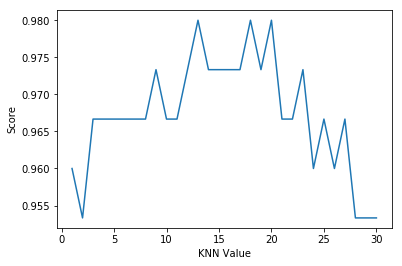

In [21]:
plt.plot(k_range, k_scores)
plt.xlabel('KNN Value')
plt.ylabel('Score')

## Cross validation on logistic regression

In [26]:
knn = KNeighborsClassifier(n_neighbors = 20)
print(cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy').mean()*100)

98.00000000000001


In [24]:
from sklearn.linear_model import LogisticRegression

In [28]:
linlog = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
print(cross_val_score(linlog, X, y, cv = 10, scoring = 'accuracy').mean()*100)

95.33333333333334


## Cross Validation: Feature Selection

In [29]:
import pandas as pd

In [30]:
import numpy as np

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)

In [33]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [34]:
X = data[['TV', 'radio', 'newspaper']]

In [36]:
y = data[['sales']]

In [38]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv = 10, scoring = 'neg_mean_squared_error')

In [39]:
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [42]:
print(np.sqrt(-scores).mean())

1.6913531708051797
